# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build the url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=993317092288dfacc7cba724f5f949b4&units=imperial&q='

In [5]:
# list to hold reponse and counter
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0

set_counter = 1

In [6]:
# print log 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")


# for loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")


print(f"-------------------------------")
print(f"Data Retrieval Complete")
print(f"-------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 : yulara
Processing Record 2 of Set 1 : kasimov
Processing Record 3 of Set 1 : hasaki
City not found. Skipping...
Processing Record 4 of Set 1 : kaitangata
Processing Record 5 of Set 1 : great yarmouth
Processing Record 6 of Set 1 : kutum
Processing Record 7 of Set 1 : tiksi
Processing Record 8 of Set 1 : dingle
Processing Record 9 of Set 1 : albany
Processing Record 10 of Set 1 : adrar
Processing Record 11 of Set 1 : barrow
Processing Record 12 of Set 1 : ilulissat
Processing Record 13 of Set 1 : hobart
Processing Record 14 of Set 1 : aleppo
Processing Record 15 of Set 1 : busselton
Processing Record 16 of Set 1 : hermanus
Processing Record 17 of Set 1 : rikitea
Processing Record 18 of Set 1 : puerto ayora
Processing Record 19 of Set 1 : jumla
Processing Record 20 of Set 1 : pombia
City not found. Skipping...
Processing Record 21 of Set 1 : mataura
Processing Record 22 of Set 1 : ribeira grande
Proce

Processing Record 33 of Set 4 : prainha
Processing Record 34 of Set 4 : promyshlennaya
Processing Record 35 of Set 4 : lugoba
Processing Record 36 of Set 4 : la palma
Processing Record 37 of Set 4 : beboto
Processing Record 38 of Set 4 : tuatapere
Processing Record 39 of Set 4 : saint-augustin
Processing Record 40 of Set 4 : roald
Processing Record 41 of Set 4 : yantal
Processing Record 42 of Set 4 : norrkoping
City not found. Skipping...
City not found. Skipping...
Processing Record 43 of Set 4 : samana
Processing Record 44 of Set 4 : fez
Processing Record 45 of Set 4 : brae
Processing Record 46 of Set 4 : turka
Processing Record 47 of Set 4 : begusarai
Processing Record 48 of Set 4 : prerov
Processing Record 49 of Set 4 : clyde river
City not found. Skipping...
Processing Record 50 of Set 4 : norman wells
Processing Record 0 of Set 5 : ostersund
Processing Record 1 of Set 5 : itarema
Processing Record 2 of Set 5 : camocim
Processing Record 3 of Set 5 : shadegan
Processing Record 4 of

Processing Record 19 of Set 8 : svetlogorsk
Processing Record 20 of Set 8 : vestmannaeyjar
Processing Record 21 of Set 8 : barranca
Processing Record 22 of Set 8 : ntcheu
Processing Record 23 of Set 8 : road town
Processing Record 24 of Set 8 : bucerias
Processing Record 25 of Set 8 : banepa
Processing Record 26 of Set 8 : san luis
Processing Record 27 of Set 8 : kendari
Processing Record 28 of Set 8 : ulverstone
Processing Record 29 of Set 8 : urucara
City not found. Skipping...
Processing Record 30 of Set 8 : kulhudhuffushi
Processing Record 31 of Set 8 : lata
Processing Record 32 of Set 8 : chirongui
Processing Record 33 of Set 8 : margate
Processing Record 34 of Set 8 : mporokoso
Processing Record 35 of Set 8 : zbarazh
Processing Record 36 of Set 8 : badiraguato
Processing Record 37 of Set 8 : strezhevoy
Processing Record 38 of Set 8 : diapaga
Processing Record 39 of Set 8 : garowe
Processing Record 40 of Set 8 : hermiston
Processing Record 41 of Set 8 : jasper
Processing Record 42

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
#Create a dataframe using information from city weather data
cities_df = pd.DataFrame({
    "City" : city_list,
    "Lat" : lat_list,
    "Lng" : lng_list,
    "Max Temp" : max_temp_list,
    "Humidity" : humidity_list,
    "Cloudiness" : cloudiness_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yulara,-25.2406,130.9889,89.44,20,0,16.11,AU,1638933398
1,Kasimov,54.9411,41.3953,34.56,100,100,8.93,RU,1638933399
2,Hasaki,35.7333,140.8333,50.40,85,100,39.44,JP,1638933400
3,Kaitangata,-46.2817,169.8464,64.92,76,98,0.76,NZ,1638933400
4,Great Yarmouth,52.6083,1.7305,43.23,75,37,24.61,GB,1638933401


In [46]:
#saves output file for WeatherPy folder
cities_df.to_csv("weather_cities_output.csv")

In [32]:
# shows measures of central tendencity for df
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,556.000000,556.000000,556.000000,556.000000,556.000000,556.000000,5.560000e+02
mean,19.978479,14.800979,52.021115,73.050360,59.717626,8.115612,1.638934e+09
std,33.003518,88.176076,28.657550,19.814118,39.314547,6.629463,1.083313e+02
min,-54.800000,-179.166700,-44.810000,12.000000,0.000000,0.000000,1.638933e+09
25%,-7.076300,-58.931775,31.967500,63.000000,18.000000,3.435000,1.638933e+09
50%,21.497250,17.697550,61.210000,77.000000,75.000000,6.450000,1.638934e+09
75%,48.051975,85.691375,74.932500,88.000000,99.000000,11.082500,1.638934e+09
max,78.218600,179.316700,94.770000,100.000000,100.000000,42.320000,1.638934e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [33]:
#find cities with >=100 humidity, use .loc
humidity_df= cities_df.loc[cities_df["Humidity"] >=100].copy()
humidity_df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kasimov,54.9411,41.3953,34.56,100,100,8.93,RU,1638933399
64,Pavelets,53.7883,39.2460,33.12,100,100,5.64,RU,1638933439
113,Nikolskoye,59.7035,30.7861,10.29,100,93,3.33,RU,1638933469
145,Mossendjo,-2.9506,12.7261,69.67,100,100,1.52,CG,1638933489
289,Chokurdakh,70.6333,147.9167,-42.54,100,56,3.71,RU,1638933572
319,Mweka,-4.8500,21.5667,68.83,100,100,1.03,CD,1638933588
327,Pevek,69.7008,170.3133,-24.23,100,100,2.55,RU,1638933593
461,Namtsy,62.7161,129.6658,-32.69,100,85,2.75,RU,1638933669
462,Kindu,-2.9500,25.9500,69.06,100,100,3.02,CD,1638933669


In [34]:
humidity_df.City


1         Kasimov
64       Pavelets
113    Nikolskoye
145     Mossendjo
289    Chokurdakh
319         Mweka
327         Pevek
461        Namtsy
462         Kindu
Name: City, dtype: object

In [35]:
#  Get the indices of cities that have humidity over 100%.
humidity_df.index

Int64Index([1, 64, 113, 145, 289, 319, 327, 461, 462], dtype='int64')

In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_cities_df = cities_df.drop(index=[11, 277, 338, 390, 399], inplace=False)
clean_cities_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yulara,-25.2406,130.9889,89.44,20,0,16.11,AU,1638933398
1,Kasimov,54.9411,41.3953,34.56,100,100,8.93,RU,1638933399
2,Hasaki,35.7333,140.8333,50.40,85,100,39.44,JP,1638933400
3,Kaitangata,-46.2817,169.8464,64.92,76,98,0.76,NZ,1638933400
4,Great Yarmouth,52.6083,1.7305,43.23,75,37,24.61,GB,1638933401
...,...,...,...,...,...,...,...,...,...
551,Shimoda,34.6667,138.9500,55.76,68,100,10.45,JP,1638933720
552,Oskarshamn,57.2645,16.4484,31.98,72,99,13.65,SE,1638933720
553,Pegnitz,49.7564,11.5450,32.49,96,96,8.34,DE,1638933721
554,Cedar City,37.6775,-113.0619,42.40,71,90,3.44,US,1638933721


In [37]:
len(cities_df)


556

In [38]:
len(clean_cities_df)

551

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

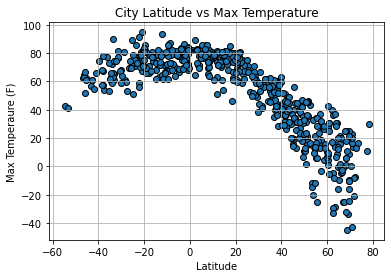

In [39]:
plt.title('City Latitude vs Max Temperature')

plt.scatter(clean_cities_df['Lat'],clean_cities_df['Max Temp'], edgecolors = 'black')

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temperaure (F)')
plt.show

#save plot as .png
plt.savefig("City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

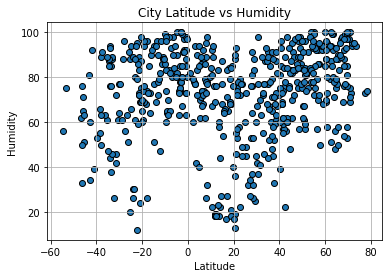

In [40]:
plt.title('City Latitude vs Humidity')

plt.scatter(clean_cities_df['Lat'],clean_cities_df['Humidity'], edgecolors = 'black')

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show

#save plot as .png
plt.savefig("City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

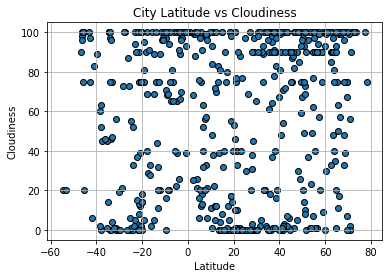

In [42]:
plt.title('City Latitude vs Cloudiness')

plt.scatter(clean_cities_df['Lat'],clean_cities_df['Cloudiness'], edgecolors = 'black')

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show

#save plot as .png
plt.savefig("City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

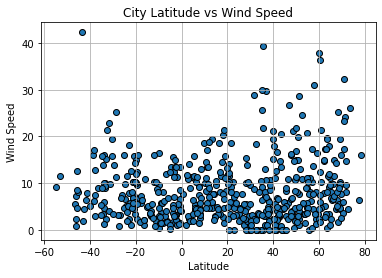

In [44]:
plt.title('City Latitude vs Wind Speed')

plt.scatter(clean_cities_df['Lat'],clean_cities_df['Wind Speed'], edgecolors = 'black')

plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show

#save plot as .png
plt.savefig("City Latitude vs Wind Speed.png")

## Linear Regression

In [54]:
from scipy import stats

In [55]:
# split into northern and southern hemisphere so Lat=0
north_hem = clean_cities_df.loc[clean_cities_df['Lat'] > 0, :]
#north_hem
south_hem = clean_cities_df.loc[clean_cities_df['Lat'] < 0, :]
south_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yulara,-25.2406,130.9889,89.44,20,0,16.11,AU,1638933398
3,Kaitangata,-46.2817,169.8464,64.92,76,98,0.76,NZ,1638933400
12,Hobart,-42.8794,147.3294,61.11,60,75,1.99,AU,1638933406
14,Busselton,-33.6500,115.3333,90.05,38,46,8.93,AU,1638933407
15,Hermanus,-34.4187,19.2345,62.91,87,100,13.87,ZA,1638933407


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7918364294200557
y = -1.29x +92.38


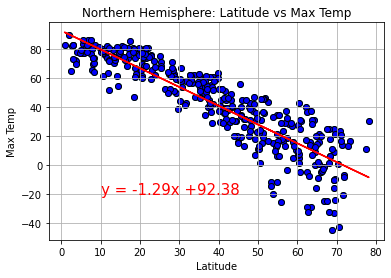

<Figure size 432x288 with 0 Axes>

In [76]:
#Set x & y values
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere: Latitude vs Max Temp')
plt.scatter(x_values,y_values,color= 'blue', edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.annotate(line_eq,(10,-20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Show plot
plt.show()

#save plot as .png
plt.savefig("Northern Hemisphere: Latitude vs Max Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.2966239094122993
y = 0.39x +80.28


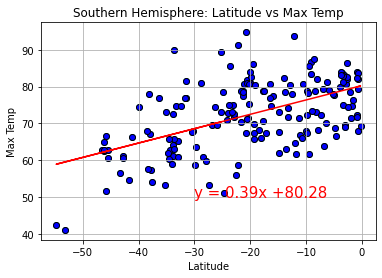

<Figure size 432x288 with 0 Axes>

In [77]:
#Set x & y values
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere: Latitude vs Max Temp')
plt.scatter(x_values,y_values,color= 'blue', edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")
print(line_eq)

# Show plot
plt.show()

#save plot as .png
plt.savefig("Southern Hemisphere: Latitude vs Max Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.1377934377656805
y = 0.37x +58.14


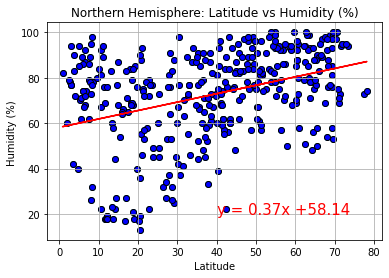

<Figure size 432x288 with 0 Axes>

In [80]:
#Set x & y values
x_values = north_hem['Lat']
y_values = north_hem['Humidity']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere: Latitude vs Humidity (%)')
plt.scatter(x_values,y_values,color= 'blue', edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%) ')

plt.annotate(line_eq,(40,20),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

#save plot as .png
plt.savefig('Northern Hemisphere: Latitude vs Humidity (%).png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15114059675805025
y = 0.54x +84.87


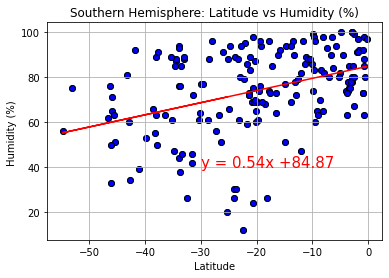

<Figure size 432x288 with 0 Axes>

In [83]:
#Set x & y values
x_values = south_hem['Lat']
y_values = south_hem['Humidity']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere: Latitude vs Humidity (%)')
plt.scatter(x_values,y_values,color= 'blue', edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Humidity (%) ')

plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

#save plot as .png
plt.savefig('Southern Hemisphere: Latitude vs Humidity (%).png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.05633149382275303
y = 0.47x +40.78


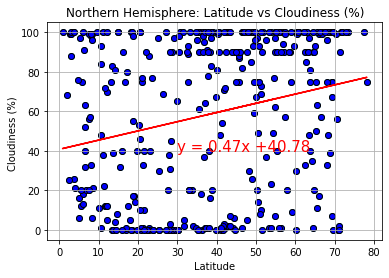

<Figure size 432x288 with 0 Axes>

In [87]:
#Set x & y values
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere: Latitude vs Cloudiness (%)')
plt.scatter(x_values,y_values,color= 'blue', edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')

plt.annotate(line_eq,(30,40),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

#save plot as .png
plt.savefig('Northern Hemisphere: Latitude vs Cloudiness (%).png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07895195698566715
y = 0.8x +76.8


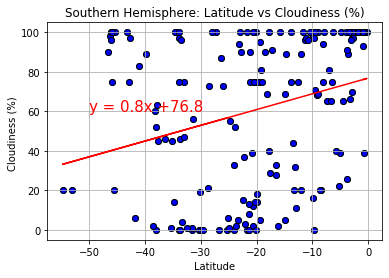

<Figure size 432x288 with 0 Axes>

In [90]:
#Set x & y values
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere: Latitude vs Cloudiness (%)')
plt.scatter(x_values,y_values,color= 'blue', edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')

plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

#save plot as .png
plt.savefig('Southern Hemisphere: Latitude vs Cloudiness (%).png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.018645307139937724
y = 0.05x +6.58


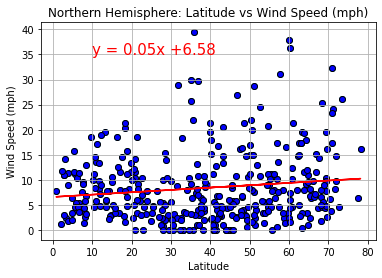

<Figure size 432x288 with 0 Axes>

In [93]:
#Set x & y values
x_values = north_hem['Lat']
y_values = north_hem['Wind Speed']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Northern Hemisphere: Latitude vs Wind Speed (mph)')
plt.scatter(x_values,y_values,color= 'blue', edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.annotate(line_eq,(10, 35),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

#save plot as .png
plt.savefig('Northern Hemisphere: Latitude vs Wind Speed (mph).png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05893082725105893
y = -0.1x +5.52


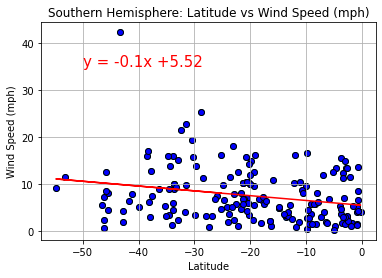

<Figure size 432x288 with 0 Axes>

In [96]:
#Set x & y values
x_values = south_hem['Lat']
y_values = south_hem['Wind Speed']

#linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title('Southern Hemisphere: Latitude vs Wind Speed (mph)')
plt.scatter(x_values,y_values,color= 'blue', edgecolors = 'black')
plt.grid()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.annotate(line_eq,(-50, 35),fontsize=15,color="red")
print(f"The r-value is: {rvalue**2}")
print(line_eq)
plt.show()

#save plot as .png
plt.savefig('Southern Hemisphere: Latitude vs Wind Speed (mph).png')

## Data Analysis

1. The cities closer to the equator have tend to have the highest maximum temperatures. Looking at the Latitude vs Temperature plot, we can see the majority of data points landing between latitudes -20 and 20 are at a plateau at around 60°F to 100°. There is also a strong correlation in the Northern Hemisphere where the r-value = 0.79 and the SOuthern Hemisphere where r-value = 0.29 .

2. Another observation made when looking the Latitude vs Wind speed plots is that there is no clear correlation between the two variables. Both hemisphere regression analysis have an r-value very close to zero - Northern r-value = 0.02 and Southern r-value = 0.06 .

3. Third observation is that there is surprisingly not a strong correlation between cloudiness and latitude.  Both hemisphere regression analysis have an r-value very close to zero - Northern r-value = 0.06 and Southern r-value = 0.08 . 
